Anggota Kelompok :    
- Edrick Setiawan (2540124021)
- Edward Federick (2540118624)
- Richard Gregorius (2501980961)
- Zaphenath Paneah Joseph Irawan (2501961520)

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from keras.utils import to_categorical
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from itertools import chain
from sklearn.preprocessing import OneHotEncoder
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import unicodedata
from gensim.models.fasttext import FastText
from sklearn.metrics import roc_curve,auc, roc_auc_score, cohen_kappa_score, brier_score_loss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout
from tensorflow.keras.layers import Dense, Bidirectional, LSTM
import tensorflow as tf
from itertools import cycle
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
%matplotlib inline
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Metode Penyelesaian Masalah

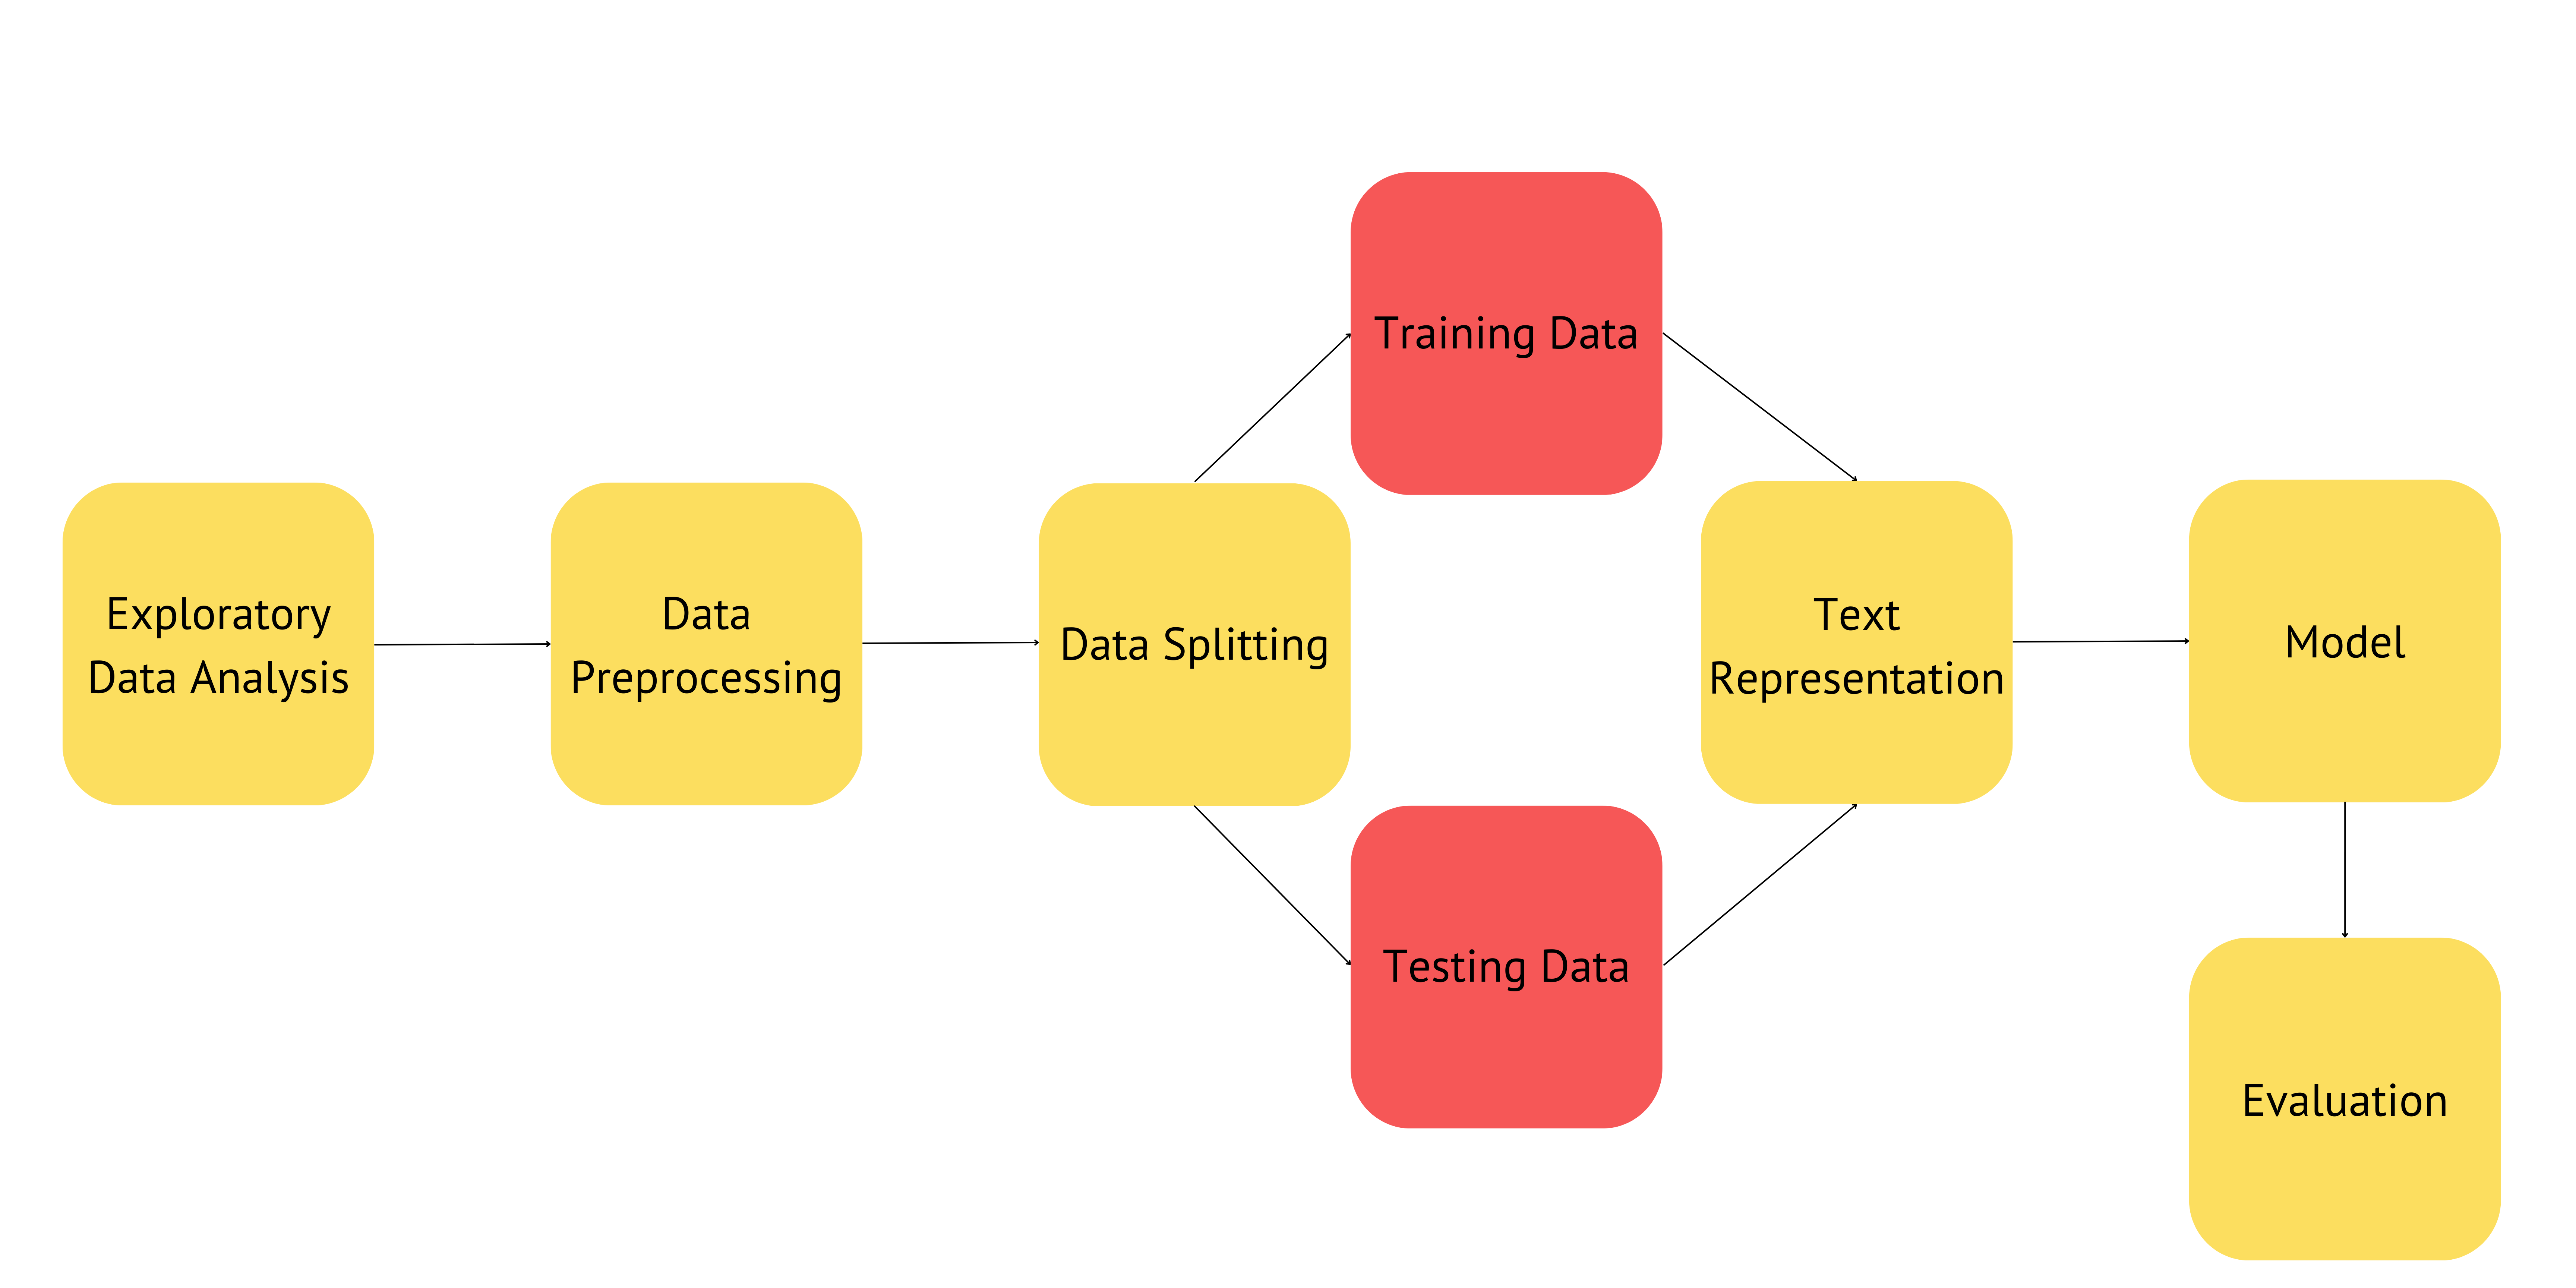

Exploratory Data Analysis

In [ ]:
# Import dataset
df = pd.read_csv("ecommerceDataset.csv", names = ["label", "text"])
df.head()

label                                               text
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...

In [ ]:
# Drop missing value
df = df.dropna(subset = ['text'])

In [ ]:
# Resample data menjadi 50%
df = df.sample(frac = 0.5, random_state = 42)

In [ ]:
df

label  \
35847  Clothing & Accessories   
13005               Household   
26164                   Books   
38330  Clothing & Accessories   
45344             Electronics   
...                       ...   
15175               Household   
49323             Electronics   
31247  Clothing & Accessories   
3365                Household   
27443                   Books   

                                                    text  
35847  BREGEO Men's Cotton Casual Blazer This one but...  
13005  HealthSense Chef-Mate KS 50 Digital Kitchen Sc...  
26164  Think & Grow Rich About the Author NAPOLEON HI...  
38330  ayushicreationa Women's Cotton Sports Padded B...  
45344  BlueRigger High Speed Micro HDMI to HDMI Cable...  
...                                                  ...  
15175  YAOJIN JAS130-F12 1.3MP 960p Bulb Shape Fishey...  
49323  Zaptin Wireless Bluetooth Headphone|Magnet Ear...  
31247  GRAPPLE DEALS Winter Wear Knitted Warmer Kids ...  
3365   Singer HC30T 2000-Watt Heat Convector (White) ...  
27443  The China Study, Revised and Expanded Edition:...  

[25212 rows x 2 columns]

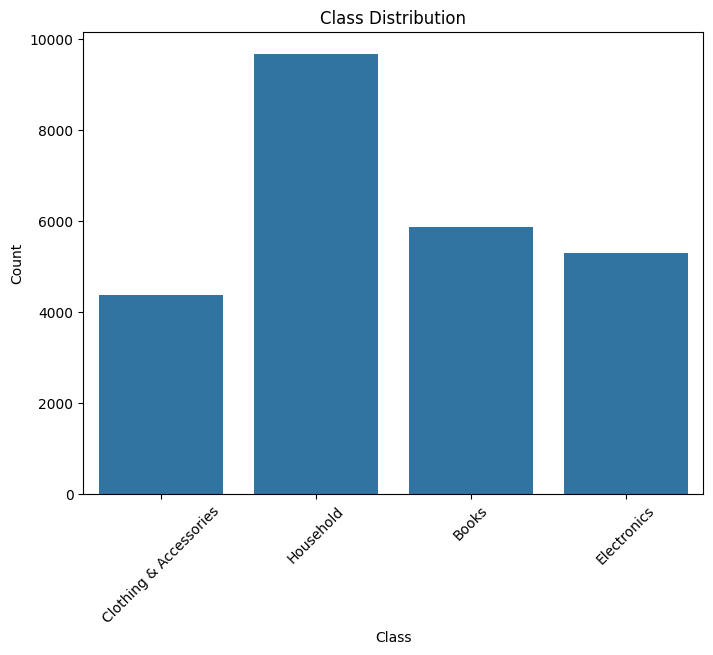

In [ ]:
# Countplot
plt.figure(figsize = (8, 6))
sns.countplot(x = 'label', data = df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df.shape

(25212, 2)

In [ ]:
# Ringkasan statistik dasar untuk datasetnya
df.describe()

label                                               text
count       25212                                              25212
unique          4                                              18057
top     Household  The Power of Your Subconscious Mind: Unlock Yo...
freq         9671                                                 16

In [ ]:
# Jumlah data per kategori/label
df['label'].value_counts()

label
Household                 9671
Books                     5869
Electronics               5294
Clothing & Accessories    4378
Name: count, dtype: int64

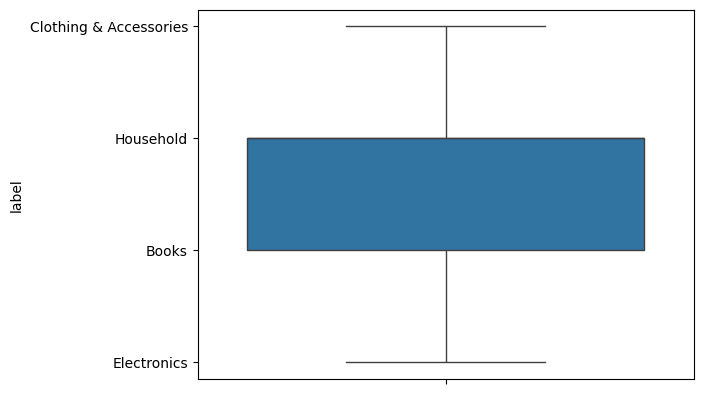

In [ ]:
# Analisis outlier
sns.boxplot(df['label'])
plt.show()

Data Preprocessing

In [ ]:
# Label encoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(df['label'])
num_classes = 20
labels_categorical = to_categorical(labels_encoded, num_classes = num_classes)

In [ ]:
# Data cleaning
def clean_text(text):
    if isinstance(text, str):
        # Menghapus spasi yang double
        text = re.sub(r'\s+', ' ', text).strip()
        # Menghapus data yang mengandung angka
        text = re.sub(r'\d+', '', text)
        # Menghapus data yang mengandung tanda baca
        text = re.sub(r'[^\w\s]', '', text)
        # Mengubah semua teks di dalam data menjadi lowercase
        text = text.lower()
        return text
    else:
        return text  # or return an empty string, or handle NaNs in another way

df['clean_text'] = df['text'].apply(clean_text)
df.head()

label  \
35847  Clothing & Accessories   
13005               Household   
26164                   Books   
38330  Clothing & Accessories   
45344             Electronics   

                                                    text  \
35847  BREGEO Men's Cotton Casual Blazer This one but...   
13005  HealthSense Chef-Mate KS 50 Digital Kitchen Sc...   
26164  Think & Grow Rich About the Author NAPOLEON HI...   
38330  ayushicreationa Women's Cotton Sports Padded B...   
45344  BlueRigger High Speed Micro HDMI to HDMI Cable...   

                                              clean_text  
35847  bregeo mens cotton casual blazer this one butt...  
13005  healthsense chefmate ks  digital kitchen scale...  
26164  think  grow rich about the author napoleon hil...  
38330  ayushicreationa womens cotton sports padded br...  
45344  bluerigger high speed micro hdmi to hdmi cable...

Data Splitting

In [ ]:
# Memecah data menjadi data training dan data testing (80 dan 20)
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], labels_encoded, test_size=0.2, random_state=42)

Text Representation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Text representation (TFIDF)
vectorizer = TfidfVectorizer(tokenizer=word_tokenize)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
train_tfidf=pd.DataFrame(X_train_tfidf.toarray(),columns=vectorizer.get_feature_names_out())
train_tfidf.head()

_  ________  ________note  __multicoloured_free  _army  _black  _blue_  \
0  0.0       0.0           0.0                   0.0    0.0     0.0     0.0   
1  0.0       0.0           0.0                   0.0    0.0     0.0     0.0   
2  0.0       0.0           0.0                   0.0    0.0     0.0     0.0   
3  0.0       0.0           0.0                   0.0    0.0     0.0     0.0   
4  0.0       0.0           0.0                   0.0    0.0     0.0     0.0   

   _bluestripe_collar_aa  _bluewhitered_  _cherry  ...  ససకతక    ①    ②    ③  \
0                    0.0             0.0      0.0  ...    0.0  0.0  0.0  0.0   
1                    0.0             0.0      0.0  ...    0.0  0.0  0.0  0.0   
2                    0.0             0.0      0.0  ...    0.0  0.0  0.0  0.0   
3                    0.0             0.0      0.0  ...    0.0  0.0  0.0  0.0   
4                    0.0             0.0      0.0  ...    0.0  0.0  0.0  0.0   

     ④    ⑤    ⑥    〇  ヒッジー  ﬁltration  
0  0.0  0.0  0.0  0.0   0.0        0.0  
1  0.0  0.0  0.0  0.0   0.0        0.0  
2  0.0  0.0  0.0  0.0   0.0        0.0  
3  0.0  0.0  0.0  0.0   0.0        0.0  
4  0.0  0.0  0.0  0.0   0.0        0.0  

[5 rows x 68416 columns]

In [ ]:
test_tfidf=pd.DataFrame(X_test_tfidf.toarray(),columns=vectorizer.get_feature_names_out())
test_tfidf.head()

_  ________  ________note  __multicoloured_free  _army  _black  _blue_  \
0  0.0       0.0           0.0                   0.0    0.0     0.0     0.0   
1  0.0       0.0           0.0                   0.0    0.0     0.0     0.0   
2  0.0       0.0           0.0                   0.0    0.0     0.0     0.0   
3  0.0       0.0           0.0                   0.0    0.0     0.0     0.0   
4  0.0       0.0           0.0                   0.0    0.0     0.0     0.0   

   _bluestripe_collar_aa  _bluewhitered_  _cherry  ...  ససకతక    ①    ②    ③  \
0                    0.0             0.0      0.0  ...    0.0  0.0  0.0  0.0   
1                    0.0             0.0      0.0  ...    0.0  0.0  0.0  0.0   
2                    0.0             0.0      0.0  ...    0.0  0.0  0.0  0.0   
3                    0.0             0.0      0.0  ...    0.0  0.0  0.0  0.0   
4                    0.0             0.0      0.0  ...    0.0  0.0  0.0  0.0   

     ④    ⑤    ⑥    〇  ヒッジー  ﬁltration  
0  0.0  0.0  0.0  0.0   0.0        0.0  
1  0.0  0.0  0.0  0.0   0.0        0.0  
2  0.0  0.0  0.0  0.0   0.0        0.0  
3  0.0  0.0  0.0  0.0   0.0        0.0  
4  0.0  0.0  0.0  0.0   0.0        0.0  

[5 rows x 68416 columns]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# Text representation (Word2Vec)
word2vec_model = Word2Vec(sentences=[sentence.split() for sentence in X_train], vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
word_vectors = word2vec_model.wv

In [ ]:
for word in word_vectors.index_to_key:
   print(f"Vector for '{word}': {word_vectors[word]}")

Streaming output truncated to the last 5000 lines.
  1.48699731e-01 -6.55086711e-02  5.02207316e-02  5.39222267e-03]
Vector for 'hipster': [-0.02188113  0.11129852  0.04068164 -0.06102086 -0.00161189 -0.06332755
  0.02996394  0.17358124 -0.10428052 -0.02047754 -0.09148896 -0.08303268
  0.03675245  0.0429889  -0.04187059 -0.01663276  0.13562416 -0.07714669
 -0.11694135 -0.16895519 -0.01880612 -0.01982961  0.07279039 -0.05764146
 -0.02363084 -0.06572409 -0.08446201  0.03477069 -0.07429565 -0.01865886
  0.0818093   0.05367104 -0.07483293 -0.09100953  0.00464852 -0.00050511
 -0.01049543 -0.03148987  0.02000762 -0.06604674  0.05691558 -0.15645815
 -0.06185991  0.07362466 -0.00694396  0.01398476 -0.12171427 -0.06502981
 -0.06194204  0.05839723  0.02884715 -0.12426253 -0.16879168 -0.04865107
  0.02230831  0.01123181  0.08530419 -0.03452283 -0.17269562  0.02056459
  0.05951358  0.05093345 -0.02108992 -0.09592622  0.01146636  0.04618197
  0.14176106  0.02326439 -0.14441031 -0.06078849  0.011299

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -0.02779     0.00528043 -0.15759169  0.01107595 -0.02864674  0.13418557
 -0.01979275 -0.04658268  0.05864428  0.100006    0.10691426  0.04833773
  0.17321362  0.06907818  0.05273054  0.01168644  0.19715041  0.05793997
  0.10779972 -0.02001989  0.07949039 -0.00993397]
Vector for 'sabrent': [-6.05507605e-02 -4.87419181e-02  4.54978012e-02  1.09827518e-02
 -1.27693973e-02 -6.40765876e-02  6.71609119e-03  3.04580182e-02
 -3.94983031e-02 -8.26168805e-02  2.79100128e-02  6.71005435e-03
 -6.21955954e-02 -1.38937281e-02 -3.94983590e-02  1.07681639e-02
 -1.77920442e-02  4.35499055e-03 -6.51313737e-02 -1.00227796e-01
 -5.21340631e-02 -4.38002124e-02 -2.94325929e-02  5.87495118e-02
 -1.60544187e-01  6.90080076e-02 -5.26292622e-02 -3.68681438e-02
 -4.28400822e-02 -8.09821188e-02  3.32034193e-02  8.52724239e-02
  3.81966345e-02  3.10758278e-02  1.19066541e-03 -7.39959329e-02
  9.62804165e-03 -7.64304772e-02  1.09663354e-02  4.64847218e-03
 -4.6302

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -0.01471205 -0.04118739  0.00318645 -0.06324504  0.01216633 -0.08240343
 -0.04317969  0.016329    0.03341574 -0.02981475 -0.04142998 -0.0101683
  0.00859875  0.0335569   0.03026215 -0.06776534 -0.03778635 -0.01971263
 -0.00941342  0.0477219   0.02939    -0.01879858 -0.02875049  0.03613785
 -0.01231286  0.03017969 -0.02694676  0.01211789 -0.02092305  0.04708253
  0.0387773   0.03452231 -0.0639309   0.0525298  -0.01554684  0.04381452
  0.10087707 -0.03508496  0.03155675  0.02284052  0.04506519  0.00879553
 -0.00544333 -0.01726442 -0.04155635 -0.00281553  0.00710417  0.05950686
 -0.00490545 -0.04419675 -0.01820922  0.01037895  0.04311047 -0.01782633
  0.08535609  0.01810323  0.02377694  0.00940857  0.06210457  0.0263763
  0.06817859 -0.02205963  0.01661049  0.01701619]
Vector for 'bostons': [-7.91221950e-03  3.51049528e-02 -1.13810049e-02  2.10276991e-03
  4.13179107e-04 -4.37566862e-02  3.13280076e-02  8.86629224e-02
 -4.75137495e-02 -4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -0.01822286  0.04254567 -0.07168587 -0.00388088  0.00591393  0.00612724
 -0.01209842 -0.0202987   0.0221041  -0.06057657  0.03407511  0.0451722
  0.02192432  0.00483039 -0.00734274 -0.0256331  -0.01885874  0.08319364
 -0.02830964  0.00743511  0.05846918 -0.04814393  0.01012704 -0.02197777
 -0.05501205  0.05940021  0.04376476 -0.04130915 -0.0867667   0.02128448
  0.002806   -0.05601143 -0.00984936  0.02272487 -0.00553001 -0.01295701
 -0.01903145  0.02780044  0.00562402 -0.02778001  0.05716376  0.02785767
 -0.04500271 -0.00262549  0.02251578 -0.00474821  0.02220922  0.08039642
 -0.01312689 -0.02501076 -0.03836257 -0.03080584 -0.03692258  0.03711082
  0.01053983 -0.01109796  0.05402442  0.01060795  0.01515692  0.01393747
  0.02264668  0.0506601   0.00414933 -0.01084506  0.0294486  -0.01050195
  0.03086777 -0.00104506  0.01502524  0.01681497  0.02014356 -0.00439559
  0.0934934   0.01464    -0.01297615  0.05096396 -0.00382664 -0.00835383
 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -5.03878621e-03  2.66669430e-02  7.55596440e-03 -4.13318863e-03
  1.96142076e-03 -5.42122219e-03 -1.60458721e-02 -3.82107049e-02
 -3.68997641e-02  1.27055058e-02 -7.26265088e-03  1.95574462e-02]
Vector for 'wtqpndpgxtl': [ 1.61413532e-02 -1.65134165e-02 -2.06223745e-02  1.73560269e-02
  6.45697000e-04 -1.08382618e-02  1.08404784e-02  1.84244402e-02
 -1.55077791e-02 -4.31113504e-03 -2.45622024e-02 -1.21838246e-02
 -2.34727822e-02 -2.31896248e-02 -3.19701154e-03  9.52873752e-03
  7.59720989e-03 -1.99770890e-02 -3.42508964e-02 -5.54412510e-03
 -5.64503893e-02  1.42707508e-02  1.62642505e-02 -1.31632539e-03
 -1.03840809e-02  4.92973160e-03 -1.19122295e-02 -5.81449177e-03
 -7.83285964e-03  2.49521085e-03  7.35994196e-03  9.86713357e-03
 -3.76161002e-02  1.76249538e-02 -7.31489016e-03 -1.30577469e-02
 -1.35043832e-02 -3.12953815e-02  2.20790729e-02 -2.21974272e-02
 -1.79735441e-02 -4.32140231e-02 -1.36005245e-02  2.37255562e-02
  1.68712325

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -0.01941106 -0.16013896 -0.02319534 -0.02243142  0.04447268 -0.01828566
 -0.02739332  0.0141501  -0.02433697  0.01187674  0.0048947  -0.01522146
  0.07624269  0.06113717 -0.00696394 -0.05351791  0.01014565  0.05227325
  0.00981928 -0.01211281 -0.01735882 -0.06596379  0.0040974  -0.06304857
  0.00755519 -0.00118411  0.06149641 -0.02876117 -0.0343146   0.00020672
 -0.00244265  0.02148972  0.01471896 -0.04745366 -0.0483471  -0.01269617
 -0.02043207  0.02979057  0.01151506 -0.01393995 -0.03685618 -0.01564641
  0.00084645  0.00448936  0.02516168  0.02429172 -0.01333263  0.00224896
  0.04812736  0.04986389 -0.09910745  0.01124942 -0.02101937  0.04809238
  0.06793562 -0.02171139  0.03133436  0.02708836  0.0282721   0.00216343
  0.02949803 -0.02375047 -0.03714836 -0.03558197  0.00377412  0.02594783
 -0.02876593 -0.05113674  0.01907159  0.03332473  0.08093977  0.01263138
  0.0584196   0.01930486  0.02029505  0.02503033  0.05836875  0.03891523


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  5.67215309e-03 -2.35777013e-02  7.02788075e-03  1.47145614e-02
  4.43942007e-03  3.83686051e-02  4.30448726e-03  1.29502760e-02
  3.45832389e-03  3.74594238e-03 -2.85939034e-02 -2.40398068e-02
  5.96695440e-03 -6.10076310e-03  3.84124019e-03  6.67021843e-04
 -1.54123632e-02 -8.05751011e-02 -2.91602630e-02 -1.57873705e-02
  3.11393067e-02  1.26224905e-02 -2.77555119e-02  6.94387779e-02
  5.62882423e-02  1.41587388e-02 -2.14450359e-02 -2.46922718e-05
 -4.37313132e-02  1.08961184e-02 -2.59634554e-02  9.26320720e-03
 -1.10114859e-02  4.58360044e-03  1.21876104e-02 -1.15540009e-02
  1.51128846e-03 -2.60334183e-02 -4.90621701e-02  5.73003106e-02
 -4.72552851e-02 -4.55100182e-03  2.55106785e-03 -2.89520118e-02
  3.82109918e-02 -6.46586046e-02  3.49283479e-02 -6.82066828e-02
 -3.44161876e-02 -3.44138651e-04 -2.19683000e-03 -2.66361907e-02
  3.23811881e-02  1.71916857e-02 -1.18846269e-02  3.27239744e-02
 -4.35729064e-02 -4.34182100e-02 -3.858

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  0.01974353  0.0052951   0.01925332 -0.00868827 -0.02469155  0.00170485
  0.0022361  -0.00178949 -0.02081483  0.0031741  -0.01680875  0.02675058
  0.02112447 -0.0482338   0.01141146  0.01734501  0.01697038  0.00465965
  0.00238454  0.0152929  -0.01806154 -0.0078765  -0.01839937  0.02600794
 -0.00406913  0.00393175  0.01535397  0.01421083  0.04544557  0.00843135
  0.0336194   0.01381124  0.01676706  0.02021469  0.01368529  0.02153954
  0.00207499 -0.00479594 -0.00164588  0.01761816]
Vector for 'slurping': [-8.55942350e-03  3.06669753e-02 -1.53508587e-02  1.47853531e-02
  3.06937518e-03 -2.60018744e-02  6.12694584e-03  5.81550524e-02
 -2.10399739e-02  7.75832357e-03 -3.82796638e-02 -2.12442447e-02
  8.03702278e-05  1.39280001e-03  3.60477436e-03 -3.50966938e-02
  1.87224932e-02 -1.01716043e-02 -1.34734837e-02 -7.75250494e-02
 -1.63898580e-02 -8.01574811e-03  6.54236879e-03 -1.49843460e-02
 -1.79577731e-02 -1.73674687e-03 -1.07535291e-02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  1.55066382e-02  5.71933910e-02  1.47523442e-02  1.81952864e-02]
Vector for 'lindquist': [ 0.00755659  0.01563033 -0.00096213  0.01251972  0.01031903 -0.01488879
  0.01483361  0.03945264 -0.02820482  0.0077834  -0.02149423 -0.00291432
 -0.00857137 -0.01532668  0.00721301  0.00370052  0.00483571 -0.00238773
  0.00175956 -0.03298181 -0.0075813   0.00289007  0.02315918 -0.02407256
 -0.02255302  0.00666329  0.00537931  0.00343312  0.00952367 -0.00965888
  0.00850543  0.01140083 -0.00418378 -0.00721429  0.01491745  0.00337739
  0.0070942   0.0180445  -0.02279362 -0.02385947  0.01371361 -0.02301806
 -0.02344769 -0.00043374 -0.00086905  0.01397377  0.00120698 -0.00918368
  0.0094711   0.00993993 -0.00320434 -0.02461399 -0.03249614 -0.02456847
 -0.00887747  0.03663706 -0.0051494  -0.00609887 -0.03146349 -0.01436922
 -0.00729667  0.02128225 -0.00588116  0.01443127  0.011659    0.01901626
  0.01257803  0.02920117 -0.01981246 -0.01368059 -0.0168

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  5.30740526e-03 -8.53519049e-03 -2.27250569e-02 -9.31558292e-03
  4.33006324e-02  2.34332103e-02 -9.63796023e-03 -5.24226297e-03
 -1.13437409e-02  1.59105305e-02  8.76276381e-03 -1.22071123e-02
 -3.49304490e-02  4.95785335e-03 -4.79282206e-03  3.71620059e-03
  7.02620065e-03 -1.88292619e-02 -3.76653566e-04 -2.26930063e-02
 -2.02548467e-02 -3.08094285e-02  3.24553461e-03  2.79285712e-03
 -1.93085689e-02 -2.50114361e-03 -5.15429163e-03  2.56964639e-02
 -2.28332803e-02 -1.48595041e-02 -3.95125337e-03 -1.59060489e-02
 -2.26021279e-03 -1.73634838e-03  4.01774235e-03 -3.99001222e-03
 -1.39266495e-02  8.78120773e-03 -8.55234684e-05 -3.95210460e-03
 -2.85459356e-03 -1.20130712e-02 -2.99815345e-03 -1.87598541e-02]
Vector for 'bhambri': [ 4.2714388e-03  9.6112667e-03  4.6378793e-03 -4.1966303e-03
  3.4721226e-02 -1.0417221e-02  2.3141099e-02  8.1569217e-03
  8.0350591e-03  3.0513685e-03  1.8006159e-03  1.3678777e-02
  1.7111214e-02 -8.1951516e-

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -1.28529919e-02  1.71653405e-02  4.87047993e-03 -2.47151013e-02
 -3.28938253e-02  1.80077031e-02  9.32469033e-03  2.62860060e-02
 -1.68295708e-02 -6.77765207e-03  6.64735632e-03  3.02323746e-03
  2.76930481e-02 -6.71693822e-03  6.76696980e-03  9.83619690e-03
  1.94084961e-02 -1.50857377e-03 -1.80226769e-02 -3.15183261e-03
 -1.99436583e-02 -1.48533937e-03  1.10792164e-02  3.75758074e-02
  2.10262928e-02 -2.29081772e-02 -1.25499815e-02  6.26867497e-03
  1.82798263e-02 -3.20308246e-02 -2.58141919e-03  1.64031070e-02
  4.43544537e-02  1.98219940e-02  1.39815528e-02  3.56164202e-02
  4.99331653e-02 -6.28174795e-03 -8.89515737e-04 -1.21205226e-02]
Vector for 'polyestersuperior': [ 0.00519395  0.00103234 -0.03683027 -0.00229135  0.0141294  -0.00867258
  0.03412765  0.05572618 -0.00425425  0.00581952  0.00643018 -0.03702943
 -0.01437573 -0.00071401  0.01058759  0.00938565  0.02307316  0.00775415
 -0.01081689 -0.03199451 -0.01438827  0.0197477

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -2.3802737e-02 -1.5094048e-02 -1.0656735e-02  7.3491298e-03
  1.7578235e-02 -2.1722063e-03  4.0312982e-03 -1.4123782e-02
 -3.4023579e-03  2.2974355e-02 -2.9949662e-03 -1.9205771e-02
  5.5141319e-03 -1.0985325e-02 -4.5531560e-03  5.7030115e-03
  5.1708040e-03 -1.6139198e-02 -1.2312211e-02  1.3303975e-02
 -4.3604290e-03 -5.0972700e-03 -1.4342649e-02  3.5466272e-03
 -1.2381531e-02 -2.1836745e-02  1.3980321e-02  2.6708558e-02
  9.1640921e-03 -1.0867333e-02 -2.8719970e-03  4.0282570e-03
  4.9855793e-04  1.4056522e-02  1.7602827e-02  2.4432087e-02
  5.6119338e-03  5.8985531e-04 -2.8574228e-02 -7.9689519e-03
 -1.0527808e-02  8.3264168e-03 -5.0860671e-03  2.5570632e-03
  2.0235149e-02  1.0090920e-02  8.6499995e-04  3.5385613e-04
 -1.0069993e-02 -7.6194229e-03 -4.6993615e-03 -3.0975074e-03
  1.2297451e-02 -3.0928620e-03  8.2742907e-03  9.4871027e-03
  5.7737874e-03 -3.4562920e-04  2.0285446e-02 -7.6790950e-03
 -1.2134390e-03  1.0934253e-02  7.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -0.03236148 -0.01289307  0.01325929  0.00173349  0.0096282  -0.00055413
  0.01864815  0.02957912  0.00391303 -0.01912479 -0.00503809  0.02314461
 -0.01011363  0.02138462 -0.01502873 -0.0071238 ]
Vector for 'kanae': [ 6.59942115e-03  1.85963847e-02  1.10407788e-02  1.76894628e-02
  2.16623042e-02  5.40406350e-03  7.12878071e-03  4.27322835e-02
 -2.50482056e-02  2.57816855e-02 -2.96487547e-02 -1.36486730e-02
 -1.18269492e-02  2.99813994e-03 -2.22966215e-03 -1.20381098e-02
  4.52170148e-03  1.58625431e-02 -2.63485238e-02 -3.50193903e-02
  1.62769314e-02 -1.94217567e-03  1.73658673e-02 -6.61909441e-03
 -1.14719830e-02 -1.16838433e-03 -1.61821884e-03 -1.28641014e-03
 -2.28364095e-02 -1.43255945e-02  1.07391188e-02  7.36653339e-03
 -2.53545539e-03 -1.14308232e-02 -1.03945592e-02  3.89428064e-03
  4.24654456e-03  9.48780309e-03 -1.74079202e-02 -2.24863607e-02
  3.52408877e-03  5.15845313e-04 -5.84708713e-03 -5.21703670e-03
  4.70061274e-03 -

In [ ]:
# Padding sequences (ensure the shape is consistent with the maximum length of sequences)
max_length = 50
X_train_tfidf = pad_sequences(sequences_train , maxlen=max_length, padding='post')
X_test_tfidf = pad_sequences(sequences_test, maxlen=max_length, padding='post')

# Expand dimensions to match LSTM input expectations
x_train_tfidf = np.expand_dims(X_train_tfidf, axis=-1)
x_test_tfidf = np.expand_dims(X_test_tfidf, axis=-1)

# Convert labels to numpy arrays
onehot_encoder = OneHotEncoder(sparse=False)
y_train_enc = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_enc = onehot_encoder.transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Modelling and Implementation

In [ ]:
# Get the size of the vocabulary
vocab_size = len(tokenizer.word_index) + 1

# Build the enhanced LSTM model
model_lstm = Sequential()

# Embedding layer
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=256, input_length=max_length))

# First LSTM layer with Dropout
model_lstm.add(LSTM(128, return_sequences=True))
model_lstm.add(Dropout(0.3))

# Second LSTM layer with Dropout
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(Dropout(0.3))

# Third LSTM layer with Dropout
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dropout(0.3))

# Dense layer
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.3))

# Output layer
model_lstm.add(Dense(y_train_enc.shape[1], activation='softmax'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model_lstm.fit(X_train_tfidf, y_train_enc, epochs=10, batch_size=64, validation_data=(X_test_tfidf, y_test_enc), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test_tfidf, y_test_enc)
print(f'LSTM Model Accuracy: {accuracy:.4f}')

Epoch 1/10
316/316 [==============================] - 257s 789ms/step - loss: 0.6886 - accuracy: 0.7391 - val_loss: 0.2858 - val_accuracy: 0.9219
Epoch 2/10
316/316 [==============================] - 253s 800ms/step - loss: 0.2036 - accuracy: 0.9527 - val_loss: 0.2228 - val_accuracy: 0.9419
Epoch 3/10
316/316 [==============================] - 249s 787ms/step - loss: 0.1339 - accuracy: 0.9713 - val_loss: 0.2861 - val_accuracy: 0.9348
Epoch 4/10
316/316 [==============================] - 255s 808ms/step - loss: 0.0881 - accuracy: 0.9823 - val_loss: 0.2464 - val_accuracy: 0.9383
Epoch 5/10
158/158 [==============================] - 10s 63ms/step - loss: 0.2228 - accuracy: 0.9419
LSTM Model Accuracy: 0.9419


In [ ]:
# Get the size of the vocabulary
vocab_size = len(tokenizer.word_index) + 1

# Build the enhanced LSTM model
model_gru = Sequential()

# Embedding layer
model_gru.add(Embedding(input_dim=vocab_size, output_dim=256, input_length=max_length))

# First GRU layer with Dropout
model_gru.add(GRU(128, return_sequences=True))
model_gru.add(Dropout(0.3))

# Second GRU layer with Dropout
model_gru.add(GRU(64, return_sequences=True))
model_gru.add(Dropout(0.3))

# Third GRU layer with Dropout
model_gru.add(GRU(32, return_sequences=False))
model_gru.add(Dropout(0.3))

# Dense layer
model_gru.add(Dense(64, activation='relu'))
model_gru.add(Dropout(0.3))

# Output layer
model_gru.add(Dense(y_train_enc.shape[1], activation='softmax'))

# Compile the model
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model_lstm.fit(X_train_tfidf, y_train_enc, epochs=10, batch_size=64, validation_data=(X_test_tfidf, y_test_enc), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test_tfidf, y_test_enc)
print(f'GRU Model Accuracy: {accuracy:.4f}')

Epoch 1/10
316/316 [==============================] - 256s 812ms/step - loss: 0.1609 - accuracy: 0.9643 - val_loss: 0.2401 - val_accuracy: 0.9423
Epoch 2/10
316/316 [==============================] - 255s 806ms/step - loss: 0.1024 - accuracy: 0.9779 - val_loss: 0.2184 - val_accuracy: 0.9437
Epoch 3/10
316/316 [==============================] - 248s 786ms/step - loss: 0.0781 - accuracy: 0.9846 - val_loss: 0.3098 - val_accuracy: 0.9423
Epoch 4/10
316/316 [==============================] - 252s 798ms/step - loss: 0.0570 - accuracy: 0.9886 - val_loss: 0.2925 - val_accuracy: 0.9455
Epoch 5/10
158/158 [==============================] - 8s 52ms/step - loss: 0.2184 - accuracy: 0.9437
LSTM Model Accuracy: 0.9437


Evaluation :

LSTM Model Accuracy : 94.19%

GRU Model Accuracy : 94.37%